In [1]:
pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 2.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.6/761.6 kB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 1.9 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 2.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

In [4]:
pip install sentencepiece


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 1.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
from transformers import T5Tokenizer, T5EncoderModel
import torch

# Load the T5 model and tokenizer
model_name = 't5-small'
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5EncoderModel.from_pretrained(model_name)

# Your sentence
sentence = "This is an example sentence."

# Tokenize the sentence and convert to tensor
inputs = tokenizer(sentence, return_tensors="pt")

# Generate the output
with torch.no_grad():
    outputs = model(**inputs)

# Get the last hidden states
last_hidden_states = outputs.last_hidden_state

# The last hidden states can be used as the sentence embedding
embedding = last_hidden_states.mean(dim=1)
print(embedding)


Some weights of the model checkpoint at t5-small were not used when initializing T5EncoderModel: ['decoder.block.4.layer.0.SelfAttention.o.weight', 'decoder.block.5.layer.0.layer_norm.weight', 'decoder.block.2.layer.0.SelfAttention.v.weight', 'decoder.block.4.layer.1.EncDecAttention.v.weight', 'decoder.block.1.layer.1.EncDecAttention.v.weight', 'decoder.block.1.layer.2.layer_norm.weight', 'decoder.block.3.layer.1.EncDecAttention.o.weight', 'decoder.block.5.layer.1.EncDecAttention.k.weight', 'decoder.block.2.layer.2.layer_norm.weight', 'decoder.block.0.layer.1.EncDecAttention.k.weight', 'decoder.block.1.layer.1.EncDecAttention.o.weight', 'decoder.block.3.layer.1.EncDecAttention.k.weight', 'decoder.block.4.layer.0.SelfAttention.v.weight', 'decoder.block.2.layer.0.SelfAttention.k.weight', 'decoder.block.0.layer.2.DenseReluDense.wo.weight', 'decoder.block.1.layer.1.EncDecAttention.q.weight', 'decoder.block.0.layer.1.EncDecAttention.q.weight', 'decoder.block.0.layer.2.layer_norm.weight', 'd

tensor([[-7.1878e-02,  2.5014e-02,  2.2586e-02,  2.2807e-02, -7.1711e-02,
          7.8794e-02, -7.1336e-02, -3.2517e-02, -1.0842e-01, -1.2221e-01,
          3.2265e-02,  7.2115e-02,  1.5096e-02, -1.9230e-02,  2.7645e-02,
          9.5502e-02,  9.4044e-03,  5.0769e-02,  8.1676e-02,  9.0867e-03,
          5.6101e-02,  1.2049e-01,  1.0590e-01, -9.7159e-02,  8.4540e-02,
         -8.3451e-02, -5.7019e-02, -1.1438e-01,  9.4860e-02, -1.9961e-01,
          9.8987e-02,  4.0558e-03, -1.6207e-01,  9.5501e-04, -1.3400e-01,
          1.3189e-02, -3.7179e-02, -7.8828e-02, -2.7984e-01,  6.3400e-03,
         -1.2038e-01,  1.7475e-02,  2.0847e-01, -1.7969e-01, -6.3872e-02,
          1.0532e-02,  1.4207e-01, -3.4793e-02,  2.6626e-02, -1.4358e-02,
          6.0901e-02, -1.3603e-02, -7.6037e-02,  1.2964e-01, -1.8282e-01,
         -3.0442e-02,  4.8073e-02,  5.9288e-02, -7.9857e-02, -1.1478e-01,
          9.1915e-03,  1.5768e-01,  3.5615e-01, -1.8048e-02, -1.7369e-01,
         -1.0484e-01, -8.0148e-02, -1.

In [7]:
import os

def read_text_files(folder_path):
    texts = []
    file_names = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r') as file:
                texts.append(file.read())
                file_names.append(file_name)
    return texts, file_names

folder_path = '/home/chao/3dmolgen/data/descriptions_train'
texts, file_names = read_text_files(folder_path)


In [9]:
from transformers import T5Tokenizer, T5EncoderModel
import torch
from tqdm import tqdm

# Check if GPU is available and use it; otherwise, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_name = 't5-small'
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5EncoderModel.from_pretrained(model_name).to(device)

def encode_texts_gpu(texts):
    embeddings = []
    for text in tqdm(texts, desc="Encoding"):
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state.mean(dim=1).cpu().numpy())
    return embeddings

embeddings = encode_texts_gpu(texts)


Some weights of the model checkpoint at t5-small were not used when initializing T5EncoderModel: ['decoder.block.4.layer.0.SelfAttention.o.weight', 'decoder.block.5.layer.0.layer_norm.weight', 'decoder.block.2.layer.0.SelfAttention.v.weight', 'decoder.block.4.layer.1.EncDecAttention.v.weight', 'decoder.block.1.layer.1.EncDecAttention.v.weight', 'decoder.block.1.layer.2.layer_norm.weight', 'decoder.block.3.layer.1.EncDecAttention.o.weight', 'decoder.block.5.layer.1.EncDecAttention.k.weight', 'decoder.block.2.layer.2.layer_norm.weight', 'decoder.block.0.layer.1.EncDecAttention.k.weight', 'decoder.block.1.layer.1.EncDecAttention.o.weight', 'decoder.block.3.layer.1.EncDecAttention.k.weight', 'decoder.block.4.layer.0.SelfAttention.v.weight', 'decoder.block.2.layer.0.SelfAttention.k.weight', 'decoder.block.0.layer.2.DenseReluDense.wo.weight', 'decoder.block.1.layer.1.EncDecAttention.q.weight', 'decoder.block.0.layer.1.EncDecAttention.q.weight', 'decoder.block.0.layer.2.layer_norm.weight', 'd

In [13]:
pip install scikit-learn


  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Note: you may need to restart the kernel to use updated packages.


Running 3D t-SNE:  99%|█████████████████████████████████████████████████████████████▌| 993/1000 [00:10<00:00, 97.63it/s]/home/chao/anaconda3/envs/EEGSDE/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/chao/anaconda3/envs/EEGSDE/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
Running 3D t-SNE: 100%|█████████████████████████████████████████████████████████████| 1000/1000 [01:25<00:00, 11.68it/s]


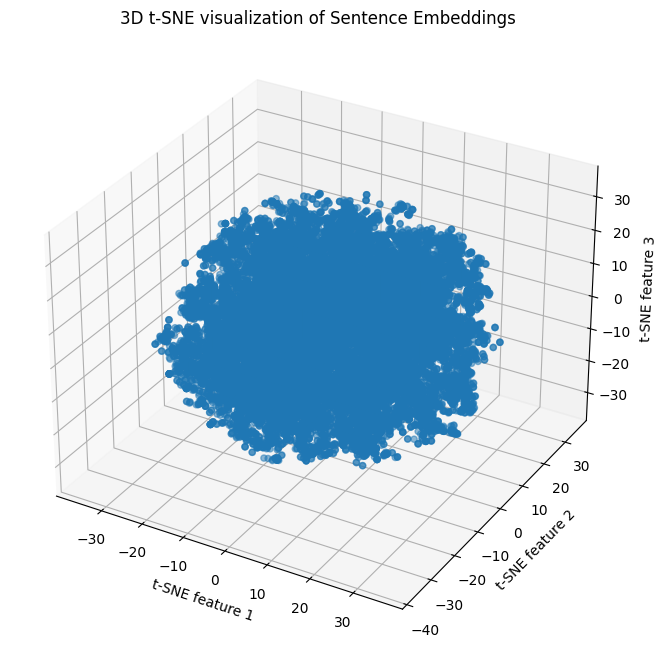

In [18]:
from sklearn.manifold import TSNE
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

embeddings_array = np.vstack(embeddings)  # Convert list of arrays to a 2D array

# Initialize t-SNE with 3 components for 3D visualization
tsne = TSNE(n_components=3, random_state=0)

# Manual progress bar setup
tsne_iterations = 1000  # Default number of iterations for t-SNE
progress_bar = tqdm(total=tsne_iterations, desc="Running 3D t-SNE")

# Update the progress bar manually
for i in range(tsne_iterations):
    progress_bar.update(1)
    time.sleep(0.01)  # Sleep for a short time to simulate progress

low_dim_embeddings_3d = tsne.fit_transform(embeddings_array)
progress_bar.close()

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(low_dim_embeddings_3d[:, 0], low_dim_embeddings_3d[:, 1], low_dim_embeddings_3d[:, 2], alpha=0.5)

ax.set_title('3D t-SNE visualization of Sentence Embeddings')
ax.set_xlabel('t-SNE feature 1')
ax.set_ylabel('t-SNE feature 2')
ax.set_zlabel('t-SNE feature 3')
plt.show()



In [19]:
pip install plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 1.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


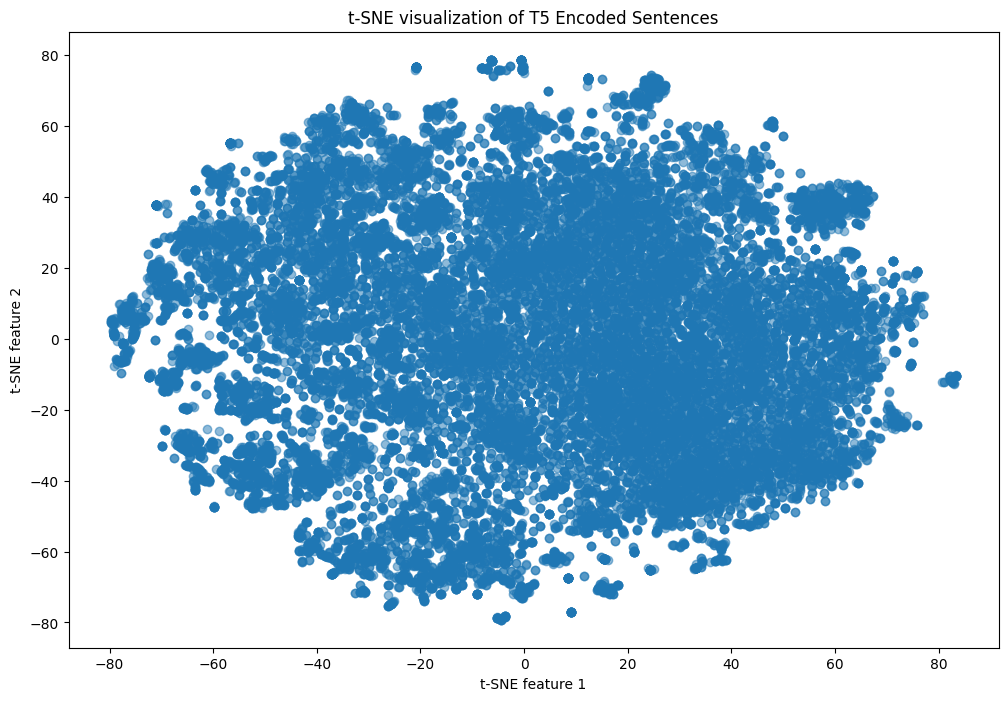

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(low_dim_embeddings[:, 0], low_dim_embeddings[:, 1], alpha=0.5)
plt.title('t-SNE visualization of T5 Encoded Sentences')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()
